<a href="https://colab.research.google.com/github/Rodaina1997/Chest-diagnosis/blob/main/Chest_Diagnoses_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
pip install split-folders

In [ ]:
pip install split-folders tqdm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models
import cv2 
from google.colab.patches import cv2_imshow
import numba
from numba import cuda


from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn import modules, Linear, ReLU,MaxPool2d
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#importing data from google drive
from google.colab import drive
import os
import glob
import PIL 
import torch
from tqdm.notebook import tqdm
import splitfolders 

# Data Preparation

**Loading files**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset_classes = {
    'Normal': '/content/drive/MyDrive/Pattern_Recognition/COVID-19_Radiography_Database/Normal',
    'Viral': '/content/drive/MyDrive/Pattern_Recognition/COVID-19_Radiography_Database/Viral Pneumonia',
    'COVID': '/content/drive/MyDrive/Pattern_Recognition/COVID-19_Radiography_Database/COVID'
}
dataset_path ='/content/drive/MyDrive/Pattern_Recognition/COVID-19_Radiography_Database'
CLASSES = ['COVID','NORMAL' ,'Viral Pneumonia']

In [ ]:
splitfolders.ratio(dataset_path, output="/content/output", seed=1337, ratio=(.75, .1,.15), group_prefix=None)

Copying files: 3886 files [41:55,  1.55 files/s]


In [ ]:
transform = transforms.Compose(
    [#transforms.ToPILImage(),
     transforms.Resize(size=(256,256)),
     transforms.ToTensor(),
     #transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
     ]) 

In [ ]:
train_data = torchvision.datasets.ImageFolder(root='/content/output/train', transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_data = torchvision.datasets.ImageFolder(root='/content/output/test', transform=transform)
testloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validate_data = torchvision.datasets.ImageFolder(root='/content/output/val', transform=transform)
valloader = torch.utils.data.DataLoader(validate_data, batch_size=32, shuffle=True)

**Reading files**

In [ ]:
from torch import nn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def train_models(model,trainloader,valloader,testloader):
  num_epochs = 5
  learning_rate = 0.0001

  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  schedular = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.3, patience=5, threshold=1e-4)

  # Train the model
  total_step = len(train_loader)
  correct = 0
  total = 0
  for epoch in range(num_epochs):
      epoch_loss = 0
      epoch_acc = 0
      for i, (images, labels) in enumerate(trainloader):  
          # Move tensors to the configured device
          images = images.view(-1, 256*256).to(device) #### THIS LINE (1,256,256) = > (256,256)
          labels = labels.to(device)
        
          # Forward pass
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          epoch_loss += loss.item()

          # Backprpagation and optimization  
          loss.backward()
          optimizer.step()

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

          correct_results_sum = (predicted == labels).sum().float()
          acc = correct_results_sum/labels.shape[0]
          acc = torch.round(acc * 100)
          
          epoch_acc += acc.item()

          f1score = f1_score(labels, predicted, average='micro')
          
      print ('Epoch [{}/{}], Loss: {:.4f}, Acc: {:.4f}' 
            .format(epoch+1, num_epochs,epoch_loss/total_step, epoch_acc/total_step))
                      
  print(f'Accuracy (Training) : {format(100 * correct / total)}% ---> F1 score: {round(f1score, 4)}')

  # Test the model
  # In the test phase, don't need to compute gradients (for memory efficiency)
  with torch.no_grad():
      correct1 = 0
      total1 = 0
      correct2 = 0
      total2 = 0
      for images1, labels1 in validation_loader:
          images1 = images1.reshape(-1, 256*256).to(device)
          labels1 = labels1.to(device)
          outputs1 = model(images1)
          _, predicted1 = torch.max(outputs1.data, 1)
          total1 += labels1.size(0)
          correct1 += (predicted1 == labels1).sum().item()
          f1score1 = f1_score(labels1, predicted1, average='micro')

      print(f'Accuracy (Validation) : {format(100 * correct1 / total1)}% ---> F1 score: {round(f1score1, 4)}')
      
      for images2, labels2 in test_loader:
          images2 = images2.reshape(-1, 256*256).to(device)
          labels2 = labels2.to(device)
          outputs2 = model(images2)
          _, predicted2 = torch.max(outputs2.data, 1)
          total2 += labels2.size(0)
          correct2 += (predicted2 == labels2).sum().item()
          f1score2 = f1_score(labels2, predicted2, average='micro')

      print(f'Accuracy (Testing) : {format(100 * correct2 / total2)}% ---> F1 score: {round(f1score2, 4)}')


In [ ]:
#not used
Data =[]
label=[]

folders = glob.glob(dataset_path+'/*')
for folder in folder:
  label.append(folder)
  for path in glob.glob(folder+'/*'):
    Data.append(path)
  

#for image_path in Data:
  #label.append(Data.index(image_path))

print(len(label))
print(len(Data))
print(Data)


NameError: ignored

**Investigate the shape of images.**

In [ ]:
#it is not nessesary to run it , it will take much time  
shapes=[]
for img_shape in Data:
  image=cv2.imread(img_shape)
  shapes.append(image.shape)

In [ ]:

# function to get unique values 
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x)) 

print(shapes)
unique(shapes) 


[(1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 

**Resizing All the Data Set**

In [ ]:
# not used now
def resizing(img,hieght,width):
  dim = (hieght,width)
  img=np.uint8(img)
  #img = np.expand_dims(img, axis=-1)
  return cv2.resize(img,dim,interpolation = cv2.INTER_AREA)

**Invistgate Different Augmintaion method**

**Split data training, validation, and testing**

In [ ]:
#not used
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

#x > Data
#y > Labels
print(len(Data))
# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(Data, label, test_size=1-train_ratio,random_state=1)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state=1) 

print(len(x_train), len(y_train), len(x_test))

# Link :https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
# startify issue: https://github.com/davidsbatista/text-classification/issues/1



3897
2727 2727 780


**My DataSet**

In [ ]:
#not used
class my_Dataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform = None):
        self.labels   = labels
        self.images = images
        self.transform = transform
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        i = self.images[index]
        x =PIL.Image.open(i).convert('RGB')
        #x=resizing(img ,331,331)
        #x=cv2.resize(x,(64,64))
        # print(len(x))
    
        y = self.labels[index]
       # y = tuple(y)

        
        if self.transform != None:
            x = self.transform(x)
    
        return x,y
  

In [ ]:
#not used
transform = transforms.Compose(
    [#transforms.ToPILImage(),
     transforms.Resize(size=(256,256)),
     transforms.ToTensor(),
     #transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
     ]) 
  

trainset = my_Dataset(x_train, y_train, transform=transform)
testset  = my_Dataset(x_test, y_test, transform=transform)
valset   = my_Dataset(x_val, y_val, transform=transform)



In [ ]:
 #not used
 #print(trainset)
x,t=trainset[1998]
print(x.shape)
print(type(t))
print(type(x))
print(x.min(),x.max())





torch.Size([3, 256, 256])
<class 'tuple'>
<class 'torch.Tensor'>
tensor(0.) tensor(0.9647)
Given list A:  ['Mon', 2, 'Tue', 3]
The tuple is :  ('Mon', 2, 'Tue', 3)


**Data Loaders**

In [ ]:
#not used
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=0)
print(len(train_loader))
test_loader = torch.utils.data.DataLoader(testset, batch_size=32,
                                          shuffle=False, num_workers=0)
print(len(test_loader))
val_loader = torch.utils.data.DataLoader(valset, batch_size=32,
                                          shuffle=False, num_workers=0)
print(len(val_loader))

NameError: ignored

In [ ]:
#not used
for X, y in train_loader:
    # (X, y) is a mini-batch (small subset of the dataset)
    # X.shape = NCHW
    print(X.shape)
    print(y.shape)
    break

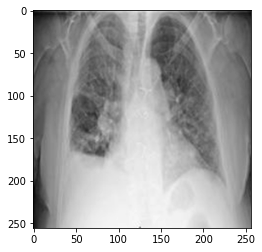

In [ ]:
#not used
plt.imshow(X[2][0],cmap='gray')

# **Basic Model**

In [ ]:
from torch import nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size) 
        self.fc5 = nn.Linear(hidden_size, hidden_size) 
        self.fc6 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)

In [ ]:
input_size = 256*256
hidden_size = 256
num_classes = 10

model = NeuralNet(input_size, hidden_size, num_classes).cuda
train_models(model,trainloader,valloader,testloader)

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

AttributeError: ignored

In [ ]:
# Build the model
model = modules.Sequential(Linear(256*256, 16),
                            ReLU(),
                            Linear(16, 16),
                            ReLU(),
                            Linear(16, 3)
                            )

# Move it to gpu
model = model.cuda()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
print_every = 100

# Optimization loop
for epoch in range(30):
    print('Start of epoch', epoch)
    total_loss = 0
    total_examples = 0
    total_correct = 0
    
    for iteration, (X, y) in enumerate(trainloader):
        # Forward
        X = X.reshape(-1, 256*256).cuda()
        y = y.cuda()
        scores = model(X)
        loss = torch.nn.functional.cross_entropy(scores, y)

        # Accuracy
        preds = torch.argmax(scores, dim=1)
        num_correct = torch.sum(preds == y)
        
        # Take average
        total_loss += loss.item()
        total_correct += num_correct.item()
        total_examples += len(X)
        if iteration % print_every == 0:
            print(total_loss / total_examples, total_correct / total_examples)
        
        # Backward
        loss.backward()
        
        # Update
        with torch.no_grad():
            optimizer.step()
            optimizer.zero_grad()

Start of epoch 0


ValueError: ignored

In [ ]:
# Initialize
# To execute all operations on GPU, move both data and network parameters to GPU.


#                                   Din, Dout
w1 = torch.nn.Parameter(torch.randn(256*256, 256).cuda())
w2 = torch.nn.Parameter(torch.randn(256, 256).cuda())
w3 = torch.nn.Parameter(torch.randn(256, 3).cuda())

#                                  Dout
b1 = torch.nn.Parameter(torch.randn(256).cuda())
b2 = torch.nn.Parameter(torch.randn(256).cuda())
b3 = torch.nn.Parameter(torch.randn(256).cuda())

step = 1
print_every = 100

# Optimization loop
for epoch in range(30):
    print('Start of epoch', epoch)
    total_loss = 0
    total_examples = 0
    total_correct = 0

    # for X, y in train_loader:
    for iteration, (X, y) in enumerate(trainloader):
        # Forward
        X = X.reshape(-1, 256*256).cuda()
        y = y.cuda()

        a1 = torch.sigmoid(X @ w1 + b1)
        a2 = torch.sigmoid(a1 @ w2 + b2)
        scores = a2 @ w3 + b3
        loss = torch.nn.functional.cross_entropy(scores, y)

        # Accuracy
        preds = torch.argmax(scores, dim=1)    # scores: (N, c) ==> (N,)
        num_correct = torch.sum(preds == y)
        
        # Take average
        total_loss += loss.item
        total_correct += num_correct.item()
        total_examples += len(X)
        if iteration % print_every == 0:
            print(total_loss / total_examples, total_correct / total_examples)
        
        # Backward
        loss.backward()
        
        # Update
        with torch.no_grad():
            w1 -= step * w1.grad
            w2 -= step * w2.grad
            w3 -= step * w3.grad
            b1 -= step * b1.grad
            b2 -= step * b2.grad
            b3 -= step * b3.grad
            
            w1.grad.zero_()
            w2.grad.zero_()
            w3.grad.zero_()
            b1.grad.zero_()
            b2.grad.zero_()
            b3.grad.zero_()

# CNNManyLayers
**

In [ ]:
from torch import nn
import torch.nn.functional as F



# Model's abstraction
class CnnManyLayers(nn.Module):
      def __init__(self):
        super(CnnManyLayers, self).__init__()
        # convolutional layers
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6,16, 5)
        self.conv3 = nn.Conv2d(16, 256, 5)

        self.pool=nn.MaxPool2d(2,2)
        
        # dropout layers to prevent overfitting
        #self.dropout1 = nn.Dropout(0.25)
        #self.dropout2 = nn.Dropout(0.5)
        #self.dropout3 = nn.Dropout(0.75)

        # fully connected layer
        self.fc1 = nn.Linear(28*28*256, 256).cuda()
        self.fc2 = nn.Linear(256,120).cuda()
        self.fc3 = nn.Linear(120, 84).cuda()
        self.fc4 = nn.Linear(84, 3) .cuda()

      def forward(self,x):
         x=self.conv1(x) #featutres exctraction 
         x=F.relu(x)
         x= self.pool(x) #to reduce image size,cost,avoid overfitting and enhancement of features extraction
         #print(x.shape)

         x=self.conv2(x)  
         x=F.relu(x)
         x= self.pool(x)
         #print(x.shape)

         x=self.conv3(x)  
         x=F.relu(x)
         x= self.pool(x)
         #print(x.shape)
        
         #x=self.dropout1(x) #to avoid overfitting
         x=torch.flatten(x,1) #to get a vector output as input to the fully connected layer ,neurons must be flattened not spatial

         x=self.fc1(x) # 1st fully connected layer for classification
         x=F.relu(x)
         #print(x.shape)

         #x=self.dropout2(x)

         x=self.fc2(x)
         x=F.relu(x)
         #print(x.shape)

         #x=self.dropout3(x)

         x=self.fc3(x)
         x=F.relu(x)
         #print(x.shape)

         #x=self.dropout4(x)

         x=self.fc4(x)
         #print(x.shape)
         output=F.log_softmax(x,dim=1) #log softmax activation function to get probablity of each class
         return output



  

# CnnFewLayers



In [ ]:
from torch import nn
import torch.nn.functional as F



# Model's abstraction
class CnnFewLayers(nn.Module):
      def __init__(self):
        super(CnnFewLayers, self).__init__()
        # convolutional layers
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6,16, 5)
        
        self.pool=nn.MaxPool2d(2,2)
        
        # dropout layers to prevent overfitting
        #self.dropout1 = nn.Dropout(0.25)
        #self.dropout2 = nn.Dropout(0.5)
        #self.dropout3 = nn.Dropout(0.75)

        # fully connected layer
        self.fc1 = nn.Linear(61*61*16, 120).cuda()
        self.fc2 = nn.Linear(120,84).cuda()
        self.fc3 = nn.Linear(84, 3).cuda()
        

      def forward(self,x):
         x=self.conv1(x) #featutres exctraction 
         x=F.relu(x)
         x= self.pool(x) #to reduce image size,cost,avoid overfitting and enhancement of features extraction
         #print(x.shape)

         x=self.conv2(x)  
         x=F.relu(x)
         x= self.pool(x)
         #print(x.shape)

        
         #x=self.dropout1(x) #to avoid overfitting
         x=torch.flatten(x,1) #to get a vector output as input to the fully connected layer ,neurons must be flattened not spatial

         x=self.fc1(x) # 1st fully connected layer for classification
         x=F.relu(x)
         #print(x.shape)

         #x=self.dropout2(x)

         x=self.fc2(x)
         x=F.relu(x)
         #print(x.shape)

         #x=self.dropout3(x)

         x=self.fc3(x)

         #print(x.shape)
         output=F.log_softmax(x,dim=1) #log softmax activation function to get probablity of each class
         return output

In [ ]:
# Accuracy calculation
def calculate_accuracy(model,train_dataloader,val_dataloader,test_dataloader):

  from sklearn.metrics import f1_score
  device = torch.device('cpu')

  n_correct_train = 0
  n_samples_train = 0
  for images, labels in train_dataloader:
    images = images.cuda()
    labels = labels.cuda()
    outputs = model(images)
    _, predicted_train = torch.max(outputs, 1)
    n_samples_train += labels.size(0)
    n_correct_train+= (predicted_train == labels).sum().item()
        

  acc_train = 100.0 * n_correct_train / n_samples_train
  f1score_train = f1_score(labels.to(device), predicted_train.to(device), average='micro')
  print(f'training Accuracy : {acc_train} %')
  print(f'training F1 score: {round(f1score_train, 5)}')


  n_correct_val = 0
  n_samples_val = 0
  for images, labels in val_dataloader:
    images = images.cuda()
    labels = labels.cuda()
    outputs = model(images)
    _, predicted_val = torch.max(outputs, 1)
    n_samples_val += labels.size(0)
    n_correct_val+= (predicted_val == labels).sum().item()
        

  acc_val = 100.0 * n_correct_val / n_samples_val
  f1score_val = f1_score(labels.to(device), predicted_val.to(device), average='micro')
  print(f'validation Accuracy : {acc_val} %')
  print(f'validation F1 score: {round(f1score_val, 5)}')



  with torch.no_grad(): # To disable gradient calculation so memory consumption decreases 
    n_correct_test = 0
    n_samples_test = 0
    for images, labels in test_dataloader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        # max returns (value ,index)
        _, predicted_test = torch.max(outputs, 1)
        n_samples_test += labels.size(0)
        n_correct_test += (predicted_test == labels).sum().item()
        

    acc_test = 100.0 * n_correct_test / n_samples_test
    f1score_test = f1_score(labels.to(device), predicted_test.to(device), average='micro')
    print(f'Testing Accuracy : {acc_test} %')
    print(f' testing F1 score: {round(f1score_test, 5)}')
    
    

# ModelRun

In [ ]:
def Run_model(model,train_dataloader,val_dataloader,test_dataloader,optimizer):

  model.train()
 
  model.cuda()

  
  predictions=[]
  labels=[]
  loss_function= nn.CrossEntropyLoss() #loss_function

  total_train_loss=0
  total_val_loss=0
  total_test_loss=0
  
  # training loop

  for i,(images,label) in enumerate(train_dataloader):
        images,label=images.cuda(),label.cuda()
        optimizer.zero_grad()  #to zero gradients at start of each new batch since backward function accumulates gradients (we don’t want to mix up gradients between minibatches)
        output = model(images) #gets the probability of each class in this batch
        train_loss = loss_function(output, label) #compares output class probabilities of the 'model' and the labels in 'training_data_loader' and gets the loss for this batch
        total_train_loss += train_loss.item()  # to get total loss of all batches
        train_loss.backward() #backward pass of optimizer
        optimizer.step() #to update weights and parameters of optimizer 
        
        

 
  #f1score_train = f1_score(labels.to(device), predicted_train, average='micro')


  model.eval() #it switches off some layers/parts of the model that behave differently during evaluation time,for ex Dropouts Layer
  
  # validation loop
  for i,(images, label) in enumerate(val_dataloader):
        images,label=images.cuda(),label.cuda()
        output = model(images)
        val_loss = loss_function(output, label)
        total_val_loss += val_loss.item()#*data.size(0)

  # testing loop
  for i,(images, label) in enumerate(test_dataloader):
        images,label=images.cuda(),label.cuda()
        output = model(images)
        test_loss = loss_function(output, label)
        total_test_loss += test_loss.item()#*data.size(0)


  #average losses
  average_train_loss = total_train_loss/len(train_dataloader.sampler)
  average_valid_loss = total_val_loss/len(val_dataloader.sampler)
  average_test_loss = total_test_loss/len(test_dataloader.sampler)

  return average_train_loss,average_train_loss,average_test_loss


In [ ]:
#initializing the models
model1=CnnManyLayers() 


epochs=5 #number of epochs

import torch.optim as optim
optimizer = optim.Adam(model1.parameters(), lr=0.0001) #for optimizing parameters
schedular = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.3, patience=5, threshold=1e-4) #it prevents conversion that happens due to over useless training



for i in range (epochs):
 
  trainloss,valloss,testloss=Run_model(model1,trainloader,valloader,testloader,optimizer )

  print(f'Epoch : {i+1}')
  print(f'Training Loss: {trainloss}')
  print(f'Validation Loss: {valloss}')
  print(f'Test Loss: {testloss}')
  calculate_accuracy(model1,trainloader,valloader,testloader )

 

Epoch : 1
Training Loss: 0.02099324558716724
Validation Loss: 0.02099324558716724
Test Loss: 0.010235875697567972
training Accuracy : 87.4356333676622 %
training F1 score: 0.0
validation Accuracy : 87.88659793814433 %
validation F1 score: 1.0
Testing Accuracy : 87.4356333676622 %
 testing F1 score: 1.0
Epoch : 2
Training Loss: 0.009383140457298517
Validation Loss: 0.009383140457298517
Test Loss: 0.0113816592718292
training Accuracy : 84.24304840370752 %
training F1 score: 1.0
validation Accuracy : 84.27835051546391 %
validation F1 score: 0.75
Testing Accuracy : 84.24304840370752 %
 testing F1 score: 1.0
Epoch : 3
Training Loss: 0.0069320878104127395
Validation Loss: 0.0069320878104127395
Test Loss: 0.025302218533528043
training Accuracy : 72.2622725712324 %
training F1 score: 1.0
validation Accuracy : 70.36082474226804 %
validation F1 score: 0.5
Testing Accuracy : 72.2622725712324 %
 testing F1 score: 0.0
Epoch : 4
Training Loss: 0.008058461927803386
Validation Loss: 0.0080584619278033

# New Section

In [ ]:
model2=CnnFewLayers()
for i in range (epochs):
 
  trainloss2,valloss2,testloss2=Run_model(model2,trainloader,valloader,testloader,optimizer )

  print(f'Epoch : {i+1}')
  print(f'Training Loss 2: {trainloss2}')
  print(f'Validation Loss 2: {valloss2}')
  print(f'Test Loss 2: {testloss2}')
  calculate_accuracy(model2,trainloader,valloader,testloader )

Epoch : 1
Training Loss 2: 0.034683122530124295
Validation Loss 2: 0.034683122530124295
Test Loss 2: 0.034682730281226135
training Accuracy : 34.5005149330587 %
training F1 score: 1.0
validation Accuracy : 34.5360824742268 %
validation F1 score: 0.5
Testing Accuracy : 34.5005149330587 %
 testing F1 score: 0.0
Epoch : 2
Training Loss 2: 0.03468263177907716
Validation Loss 2: 0.03468263177907716
Test Loss 2: 0.0346957380076761
training Accuracy : 34.5005149330587 %
training F1 score: 1.0
validation Accuracy : 34.5360824742268 %
validation F1 score: 0.5
Testing Accuracy : 34.5005149330587 %
 testing F1 score: 0.0
Epoch : 3
Training Loss 2: 0.03468253831048213
Validation Loss 2: 0.03468253831048213
Test Loss 2: 0.03469625458126415
training Accuracy : 34.5005149330587 %
training F1 score: 1.0
validation Accuracy : 34.5360824742268 %
validation F1 score: 1.0
Testing Accuracy : 34.5005149330587 %
 testing F1 score: 0.0
Epoch : 4
Training Loss 2: 0.034682353378529
Validation Loss 2: 0.03468235

In [ ]:
res_model_not_pretrained = torchvision.models.resnet18(pretrained=False)
res_model_pretrained = torchvision.models.resnet18(pretrained=True)
#densenet_model = models.densenet161()


#res_model = nn.Linear(num_fltrs , 3)
#ens_model = torchvision.models.densenet(pretrained=True)
#ins_model = torchvision.models.inception_v3()




**Resnet**

In [ ]:
#from sklearn.metrics import f1_score
def train_model(res_model):
  #calculate number of  in features 
  num_fltrs = res_model.fc.in_features
  # Freeze all layers
  for param in res_model.parameters():
    param.requires_grad = False
      

  # Replace the last layer
  # Parameters of newly constructed modules have requires_grad=True by default len(trainset.classes
  #res_model.classifier = nn.Linear(25088, 3)
  #Tensor for 'out' is on CPU, Tensor for argument #1 'self' is on CPU, but expected them to be on GPU (while checking arguments for addmm)
  res_model.fc = torch.nn.Linear(num_fltrs, out_features = 3)
  #res_model = res_model.to('cuda:0')
  #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  # Optimize only the parameters of ''classifier'
  optimizer = torch.optim.Adam(res_model.parameters(), lr=1e-3)
  #crit = nn.CrossEntropyLoss()
  #if (dataloaders == "train"):
  #res_model.train()
  res_model = res_model.cuda()

  # Loss and optimizer
  num_epochs = 15
  print_every = 10
  #res_model_a = res_model
 # res_model_b = res_model

  # Optimization loop
  for epoch in range(num_epochs):
      print('Start of epoch', epoch)
      total_loss = 0
      total_examples = 0
      total_correct = 0
      num_correct = 0
      H = 0
      N = 0
      A = 0
      B = 0

      
      for iteration, (x, Y) in enumerate(trainloader):
          res_model.train(True)
         # res_model_a = res_model.cuda()
          # Forward
          x = x.cuda()
          Y = Y.cuda()
          scores = res_model(x)

          # Loss
          loss = torch.nn.functional.cross_entropy(scores, Y)

        
          
          # Accuracy
          preds = torch.argmax(scores, dim=1)
          num_correct = torch.sum(preds == Y)
          #f1score = f1_score(y, preds, average='micro')
          
          # Print
          total_loss += loss.item()
          total_correct += num_correct.item()
          total_examples += len(x)
          if iteration % print_every == 0:
              H += (total_loss / total_examples)
              N += (total_correct/total_examples)
              #print('trainLoss ='+ str(total_loss / total_examples))
              #print('trainAcc ='+ str(total_correct/total_examples))
             # print(f1score)
          
          # Backward
          loss.backward()
          
          # Update
          with torch.no_grad():
              optimizer.step()
              optimizer.zero_grad()
      total_loss = 0
      total_examples = 0
      total_correct = 0
      num_correct = 0
      H = "{:.4f}".format(H/10)
      N = "{:.4f}".format(N/10)
      print('trainLoss ='+ str(H))
      print('trainAcc ='+ str(N))
      for iteration, (X, y) in enumerate(valloader):
          res_model.eval
          #res_model = res_model.cuda()
          # Forward
          X = X.cuda()
          y = y.cuda()
          scores = res_model(X)

          # Loss
          loss = torch.nn.functional.cross_entropy(scores, y)

        
          
          # Accuracy
          preds = torch.argmax(scores, dim=1)
          num_correct = torch.sum(preds == y)
          
          # Print
          total_loss += loss.item()
          total_correct += num_correct.item()
          total_examples += len(valloader)
          if iteration % print_every == 0:
              A += (total_loss / total_examples)
              B += (total_correct/total_examples)
            #print('valLoss ='+ str(total_loss / total_examples))
            #print('valAcc ='+ str(total_correct/total_examples))
          
          # Update
          with torch.no_grad():
              #optimizer.step()
              optimizer.zero_grad()
              
      A = "{:.4f}".format(A/10)
      B = "{:.4f}".format(B/10)
      print('valLoss ='+ str(A))
      print('valAcc ='+ str(B))
      print('......................')
              

In [ ]:
#train_model(res_model_not_pretrained)
train_model(res_model_pretrained)

Start of epoch 0
trainLoss =0.0216
trainAcc =0.7225
valLoss =0.0037
valAcc =0.4629
......................
Start of epoch 1
trainLoss =0.0081
trainAcc =0.9216
valLoss =0.0026
valAcc =0.4776
......................
Start of epoch 2
trainLoss =0.0069
trainAcc =0.9206
valLoss =0.0019
valAcc =0.4748
......................
Start of epoch 3
trainLoss =0.0055
trainAcc =0.9476
valLoss =0.0024
valAcc =0.4650
......................
Start of epoch 4
trainLoss =0.0048
trainAcc =0.9499
valLoss =0.0023
valAcc =0.4713
......................
Start of epoch 5
trainLoss =0.0050
trainAcc =0.9469
valLoss =0.0015
valAcc =0.4741
......................
Start of epoch 6
trainLoss =0.0047
trainAcc =0.9452
valLoss =0.0015
valAcc =0.4832
......................
Start of epoch 7
trainLoss =0.0041
trainAcc =0.9547
valLoss =0.0019
valAcc =0.4741
......................
Start of epoch 8
trainLoss =0.0046
trainAcc =0.9432
valLoss =0.0014
valAcc =0.4839
......................
Start of epoch 9
trainLoss =0.0041
trainAcc =0

In [ ]:

def train_model_val(res_model,valloaders):
  num_fltrs = res_model.fc.in_features
  # Freeze all layers
  for param in res_model.parameters():
    param.requires_grad = False
      

  # Replace the last layer
  # Parameters of newly constructed modules have requires_grad=True by default len(trainset.classes
  #res_model.classifier = nn.Linear(25088, 3)
  #Tensor for 'out' is on CPU, Tensor for argument #1 'self' is on CPU, but expected them to be on GPU (while checking arguments for addmm)
  res_model.fc = torch.nn.Linear(num_fltrs, out_features = 3)
  #res_model = res_model.to('cuda:0')
  #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  # Optimize only the parameters of ''classifier'
  optimizer = torch.optim.Adam(res_model.parameters(), lr=1e-3)
  #crit = nn.CrossEntropyLoss()
  #if (dataloaders == "train"):
  res_model = res_model.cuda()

  # Loss and optimizer
  num_epochs = 5
  print_every = 10

  # Optimization loop
  for epoch in range(num_epochs):
      print('Start of epoch', epoch)
      total_loss = 0
      total_examples = 0
      total_correct = 0
      num_correct = 0

      
      for iteration, (X, y) in enumerate(valloader):
          # Forward
          X = X.cuda()
          y = y.cuda()
          scores = res_model(X)

          # Loss
          loss = torch.nn.functional.cross_entropy(scores, y)

        
          
          # Accuracy
          preds = torch.argmax(scores, dim=1)
          num_correct = torch.sum(preds == y)
          
          # Print
          total_loss += loss.item()
          total_correct += num_correct.item()
          total_examples += len(X)
          if iteration % print_every == 0:
              print(total_loss / total_examples)
          
          
          # Update
          
          optimizer.zero_grad()
              

In [ ]:
train_model_val(res_model_not_pretrained,valloader)
train_model_val(res_model_pretrained,valloader)

Start of epoch 0
0.040929269045591354
0.03894013301892714
Start of epoch 1
0.03861590474843979
0.03879295255650173
Start of epoch 2
0.040694475173950195
0.039072025905955925
Start of epoch 3
0.035858556628227234
0.03878326307643543
Start of epoch 4
0.036722078919410706
0.0388918783177029
Start of epoch 0
0.04677983373403549
0.04158848862756382
Start of epoch 1
0.04442312568426132
0.042017253962430084
Start of epoch 2
0.040883325040340424
0.041240579363974655
Start of epoch 3
0.034565869718790054
0.0409862141717564
Start of epoch 4
0.04021246358752251
0.041749436408281326


In [ ]:
# Freeze all layers
for param in res_model.parameters():
    param.requires_grad = False
    

# Replace the last layer
# Parameters of newly constructed modules have requires_grad=True by default len(trainset.classes
#res_model.classifier = nn.Linear(25088, 3)
#Tensor for 'out' is on CPU, Tensor for argument #1 'self' is on CPU, but expected them to be on GPU (while checking arguments for addmm)
res_model.fc = torch.nn.Linear(num_fltrs, out_features = 3)
#res_model = res_model.to('cuda:0')
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Optimize only the parameters of ''classifier'
optimizer = torch.optim.Adam(res_model.parameters(), lr=1e-3)
crit = nn.CrossEntropyLoss()

res_model.train()
res_model = res_model.to(device)

# Loss and optimizer
num_epochs = 5
print_every = 10

# Optimization loop
for epoch in range(num_epochs):
    print('Start of epoch', epoch)
    total_loss = 0
    total_examples = 0
    total_correct = 0
    num_correct = 0

    
    for iteration, (X, y) in enumerate(train_loader):
        # Forward
        X = X.cuda
        y = y.cuda
        scores = res_model(X)

       # X = X.view(-1 , 331*331) # da b3d el resize msh 3arf malo 
        optimizer.zero_grad()
        print(X.shape)
        
        print("1")

        # Loss
        loss = crit(scores, y)

        # Accuracy
        _, predicted = torch.max(scores.data, 1)
        total_correct += y.size(0)
        num_correct += (predicted == y).sum()
        # preds = torch.argmax(scores, dim=1)
        # num_correct = torch.sum(preds == y)
        
        # Print
        total_loss += loss.item()
        # total_correct += num_correct.item()
        # total_examples += len(X)
        if iteration % print_every == 0:
            print(total_loss / total_examples, num_correct/total_correct)
        
        # Backward
        loss.backward()
        
        # Update
        with torch.no_grad():
            optimizer.step()
            

AttributeError: ignored

**DenseNet**

In [ ]:
# Freeze all layers
for param in dens_model.parameters():
    param.requires_grad = False

# Replace the last layer
# Parameters of newly constructed modules have requires_grad=True by default
dens_model.classifier = nn.Linear(25088, len(trainset.classes))  

# Optimize only the parameters of ''classifier'
optimizer = torch.optim.Adam(dens_model.classifier.parameters(), lr=1e-3)

dens_model.train()
dens_model = dens_model.cuda()

# Loss and optimizer
num_epochs = 5
print_every = 10

# Optimization loop
for epoch in range(num_epochs):
    print('Start of epoch', epoch)
    total_loss = 0
    total_examples = 0
    total_correct = 0
    
    for iteration, (X, y) in enumerate(train_loader):
        # Forward
        X = X.cuda()    
        y = y.cuda()
        scores = dens_model(X)

        # Loss
        loss = torch.nn.functional.cross_entropy(scores, y)

        # Accuracy
        preds = torch.argmax(scores, dim=1)
        num_correct = torch.sum(preds == y)
        
        # Print
        total_loss += loss.item()
        total_correct += num_correct.item()
        total_examples += len(X)
        if iteration % print_every == 0:
            print(total_loss / total_examples, total_correct / total_examples)
        
        # Backward
        loss.backward()
        
        # Update
        with torch.no_grad():
            optimizer.step()
            optimizer.zero_grad()

**Inspection**

In [ ]:
# Freeze all layers
for param in ins_model.parameters():
    param.requires_grad = False

# Replace the last layer
# Parameters of newly constructed modules have requires_grad=True by default
ins_model.classifier = nn.Linear(25088, len(trainset.classes))  

# Optimize only the parameters of ''classifier'
optimizer = torch.optim.Adam(ins_model.classifier.parameters(), lr=1e-3)

ins_model.train()
ins_model = ins_model.cuda()

# Loss and optimizer
num_epochs = 5
print_every = 10

# Optimization loop
for epoch in range(num_epochs):
    print('Start of epoch', epoch)
    total_loss = 0
    total_examples = 0
    total_correct = 0
    
    for iteration, (X, y) in enumerate(train_loader):
        # Forward
        X = X.cuda()    
        y = y.cuda()
        scores = ins_model(X)

        # Loss
        loss = torch.nn.functional.cross_entropy(scores, y)

        # Accuracy
        preds = torch.argmax(scores, dim=1)
        num_correct = torch.sum(preds == y)
        
        # Print
        total_loss += loss.item()
        total_correct += num_correct.item()
        total_examples += len(X)
        if iteration % print_every == 0:
            print(total_loss / total_examples, total_correct / total_examples)
        
        # Backward
        loss.backward()
        
        # Update
        with torch.no_grad():
            optimizer.step()
            optimizer.zero_grad()